## Conditional Node

In [1]:
from langgraph.graph import StateGraph , START , END
from typing import TypedDict , List

In [2]:
class AgentState(TypedDict):
    number_1:int
    number_2:int
    operation:str
    final_num:int

In [3]:
def addition(state:AgentState)->AgentState:
    """Adds two numbers"""
    state['final_num'] = state['number_1'] + state['number_2']
    return state

In [4]:
def subtraction(state:AgentState)->AgentState:
    """Subtracts two numbers"""
    state['final_num']= abs(state['number_1']-state['number_2'])
    return state

In [5]:
def decide_next_node (state:AgentState)->str:
    """Decide the next node"""
    if state['operation']=='+':
        return "addition_operation"
    elif state['operation']=="-":
        return "subtraction_operation"
    else : 
        return "invalid operation"


In [6]:
graph = StateGraph(AgentState)
graph.add_node("router" , lambda state:state)
graph.add_node("adder" , addition)
graph.add_node("subtracter" , subtraction)
graph.add_edge(START , "router")
graph.add_edge("adder",END)
graph.add_edge("subtracter" , END)

In [7]:
graph.add_conditional_edges(
    "router" ,
    decide_next_node ,
    {
        "addition_operation" : "adder" ,
        "subtraction_operation" : "subtracter",
        "invalid_operation" : END
    }
)

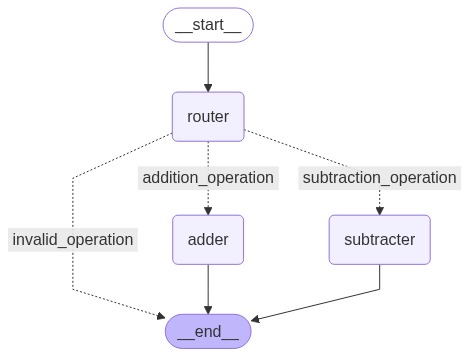

In [8]:
app = graph.compile()
app

In [ ]:
state = AgentState(number_1=10 , number_2=20 , operation="-") #type:ignore
app.invoke(state)['final_num'] #type:ignore

10